In [1]:
from autoencoder import AutoEncoder, VariationalAutoEncoder, RMS
import resources
%matplotlib widget

# Load in RMS data for tests

In [2]:
exps = ['Test 5', 'Test 7', 'Test 8', 'Test 9']
rms = {}

for test in exps:
    rms[test] = RMS(test)
    
try:
    rms['Test 5'].data.drop(['23', '24'], axis=1, inplace=True)
except KeyError:
    pass


Loaded Test 5 RMS Data

Loaded Test 7 RMS Data

Loaded Test 8 RMS Data

Loaded Test 9 RMS Data


# Setup Variational Autoencoder for each Test
- The model is trained over a small section of the test depending on `train_slice`.
- The model parameters are specified within the `params` dict.

In [3]:
vae = {}
for test in exps:
        vae[test] = VariationalAutoEncoder(rms[test],
                                           tb=False,
                                           tb_logdir=rms[test].exp_name,
                                           train_slice=(0, 50),
                                           random_state=1,
                                           params={'latent_dim': 2,
                                                   'n_size': [32, 32],
                                                   'epochs': 250,
                                                   'batch_size': 10,
                                                   }
                                           )

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 407)
	Input val shape: (5, 407)

VAE-TEST_5-E-250-L-[32, 32, 'Z', 32, 32]-T-20230502-160737

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 410)
	Input val shape: (5, 410)

VAE-TEST_7-E-250-L-[32, 32, 'Z', 32, 32]-T-20230502-160737

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 393)
	Input val shape: (5, 393)

VAE-TEST_8-E-250-L-[32, 32, 'Z', 32, 32]-T-20230502-160737

Pre-Processing Data:
	Training Data: slice(0, 50, None)
	Input train shape: (45, 394)
	Input val shape: (5, 394)

VAE-TEST_9-E-250-L-[32, 32, 'Z', 32, 32]-T-20230502-160737



# Train each VAE on the training data
- `x` is the inputted data for training, which is `vae.train_data`
- `val_data` is the validation data from `vae.val_data`

In [4]:
for test in exps:
        vae[test].fit(x=vae[test].train_data,
                      val_data=vae[test].val_data,
                      verbose=0,
                      use_multiprocessing=True,
                      )

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

Training:   0%|           0/250 ETA: ?s,  ?epochs/s

# Results Visualisation

## Loss plot of each trained model

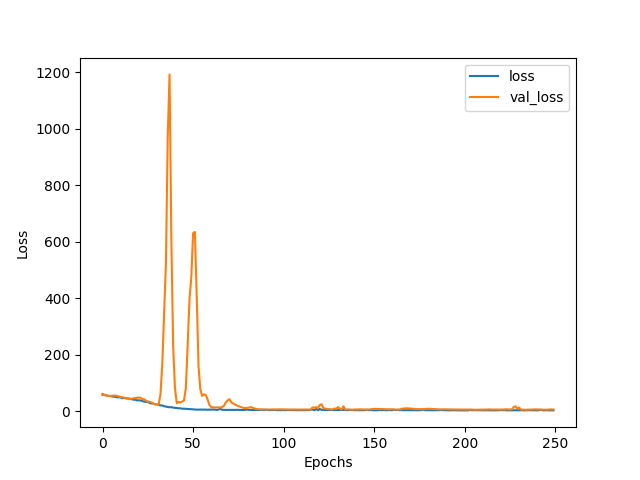

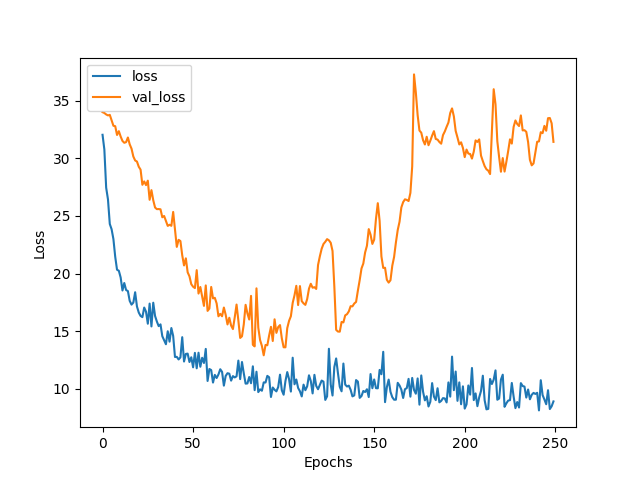

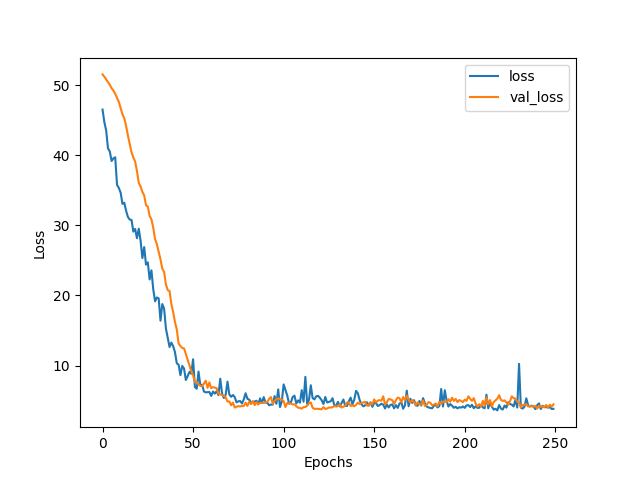

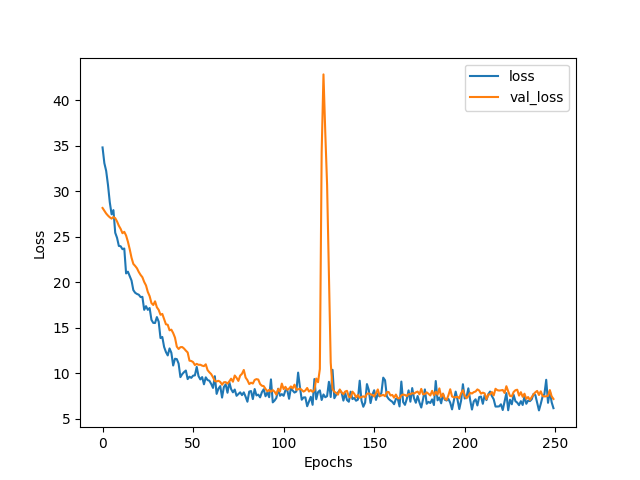

In [5]:
for test in exps:
    vae[test].loss_plot()

## Score each model
- Models scored on train, validation and whole dataset

In [6]:
for test in exps:
    print(f'\n {test}')
    pred_tr, scores_tr = vae[test].score('train')
    pred_val, scores_val = vae[test].score('val')
    pred_data, scores_data = vae[test].score('dataset')


 Test 5

Train Scores:
	MAE: 0.08306
	MSE: 0.02326
	R2: -1.36837

Val Scores:
	MAE: 0.07137
	MSE: 0.01199
	R2: 0.47438

Dataset Scores:
	MAE: 0.16042
	MSE: 0.09146
	R2: -0.45118

 Test 7

Train Scores:
	MAE: 0.10369
	MSE: 0.01764
	R2: 0.58488

Val Scores:
	MAE: 0.19662
	MSE: 0.07471
	R2: -0.36485

Dataset Scores:
	MAE: 0.17747
	MSE: 0.06361
	R2: 0.18919

 Test 8

Train Scores:
	MAE: 0.07279
	MSE: 0.00924
	R2: 0.37143

Val Scores:
	MAE: 0.08042
	MSE: 0.01136
	R2: 0.23026

Dataset Scores:
	MAE: 0.17150
	MSE: 0.09327
	R2: -0.36681

 Test 9

Train Scores:
	MAE: 0.08888
	MSE: 0.01359
	R2: 0.46926

Val Scores:
	MAE: 0.10044
	MSE: 0.01691
	R2: 0.24763

Dataset Scores:
	MAE: 0.18067
	MSE: 0.07582
	R2: -0.03702


## Show histogram of scores across whole dataset

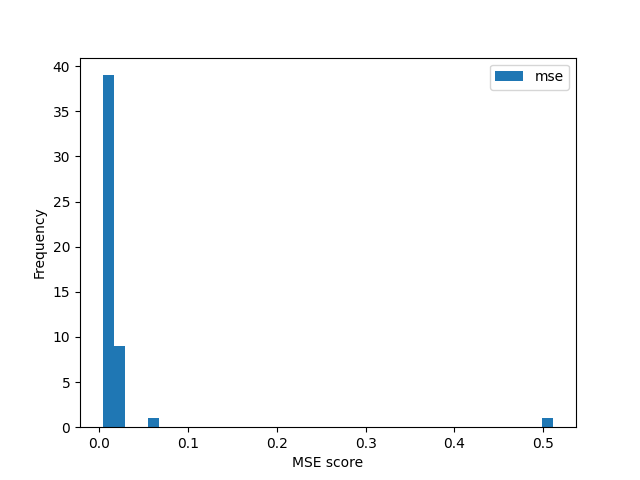

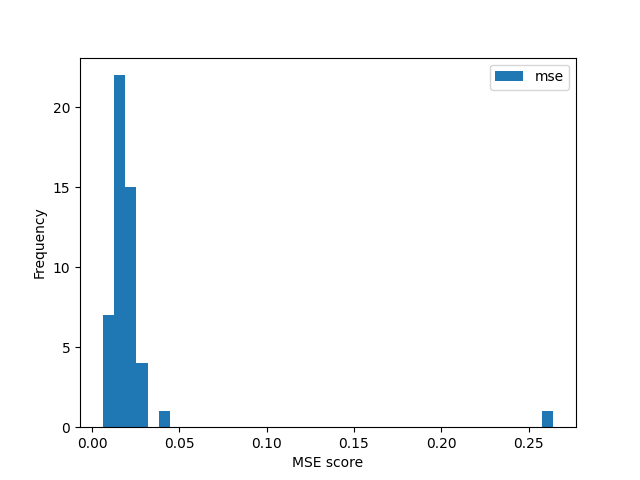

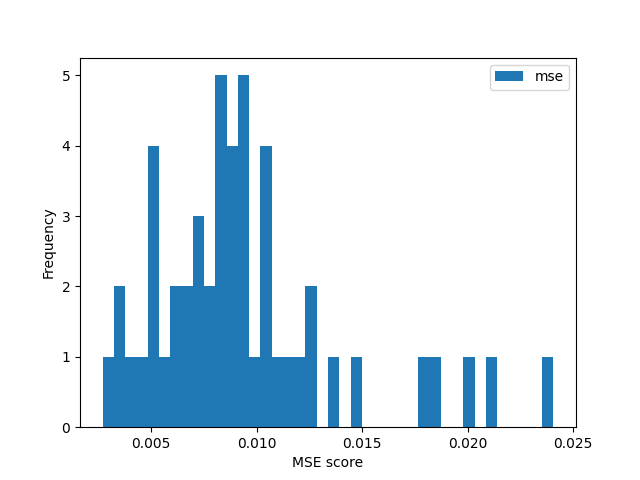

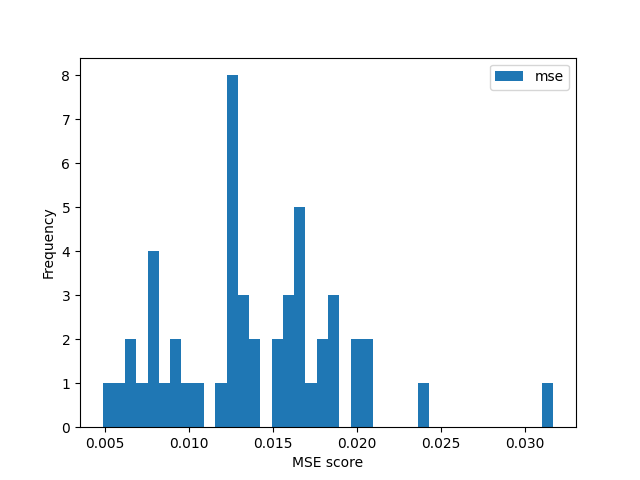

In [7]:
for test in exps:
    fig, ax = vae[test].hist_scores(['mse'])

## Show model recreation capability of training and validation sets

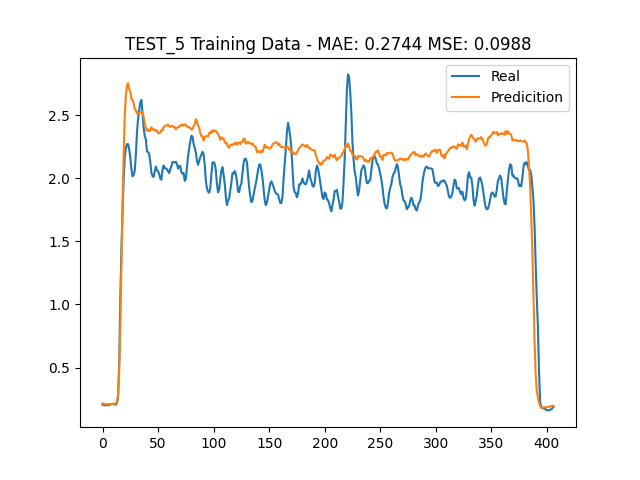

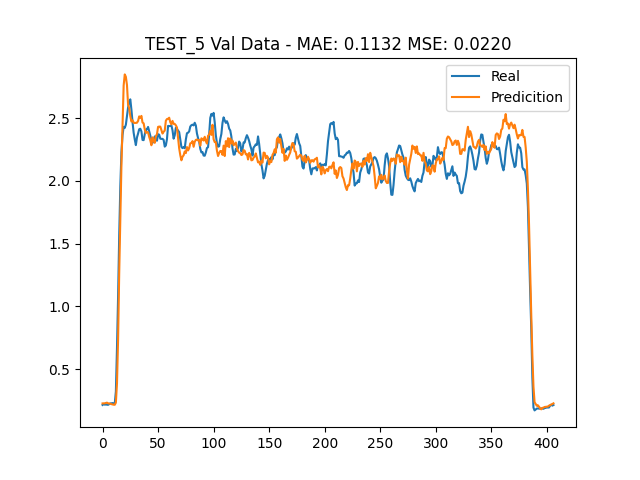

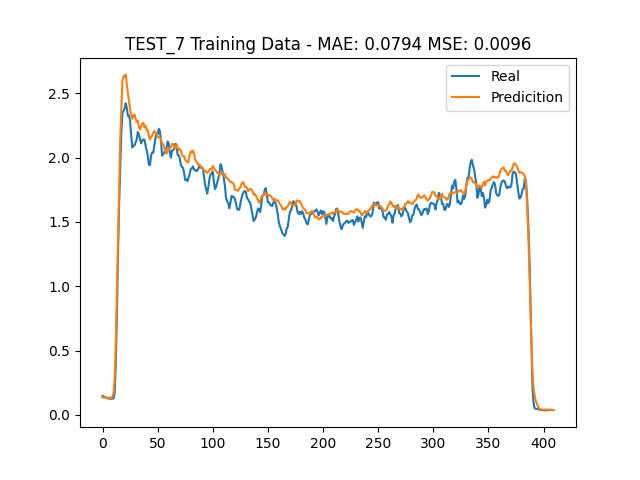

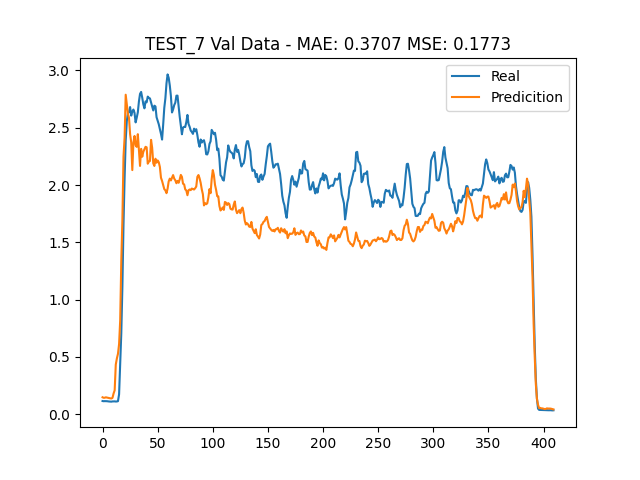

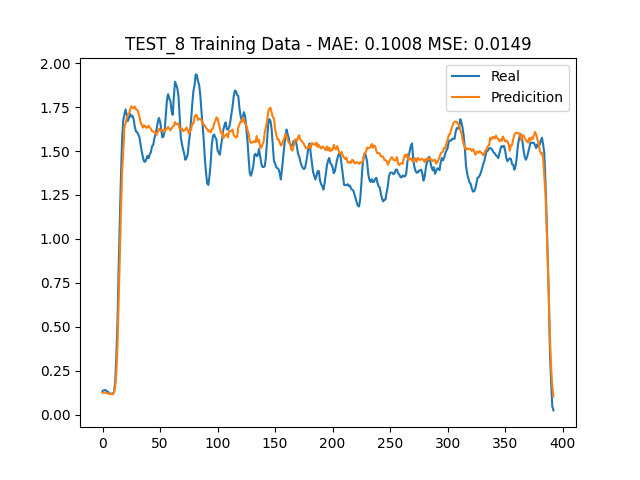

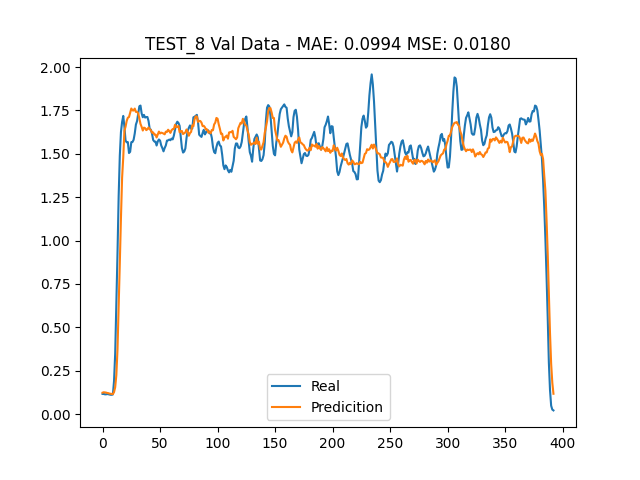

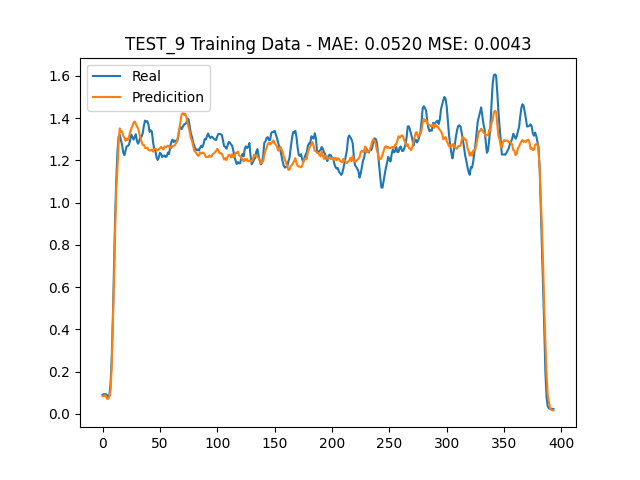

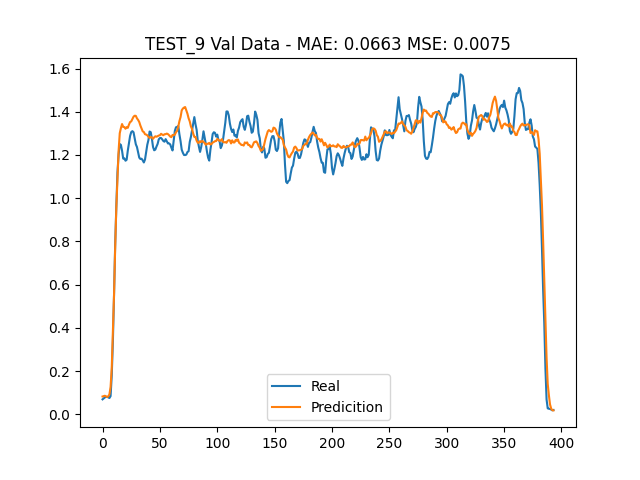

In [8]:
for test in exps:
    fig, ax = vae[test].pred_plot(vae[test]._ind_tr[0])
    ax.set_title(f'{vae[test].RMS.exp_name} Training Data - {ax.get_title()}')
    fig, ax = vae[test].pred_plot(vae[test]._ind_val[0])
    ax.set_title(f'{vae[test].RMS.exp_name} Val Data - {ax.get_title()}')

## Thresholds for anomaly detection of each model

In [9]:
for test in exps:
    vae[test].thres


Cutoffs:
	MAE cutoff: 0.17482
	MSE cutoff: 0.09265
	R2 cutoff: -12.80184

Cutoffs:
	MAE cutoff: 0.16608
	MSE cutoff: 0.05828
	R2 cutoff: -0.10363

Cutoffs:
	MAE cutoff: 0.09102
	MSE cutoff: 0.01396
	R2 cutoff: 0.08101

Cutoffs:
	MAE cutoff: 0.10636
	MSE cutoff: 0.01906
	R2 cutoff: 0.29078


## Show scores against threshold

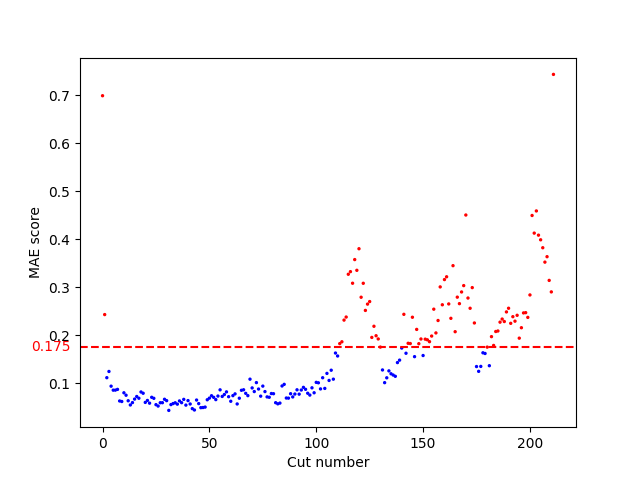

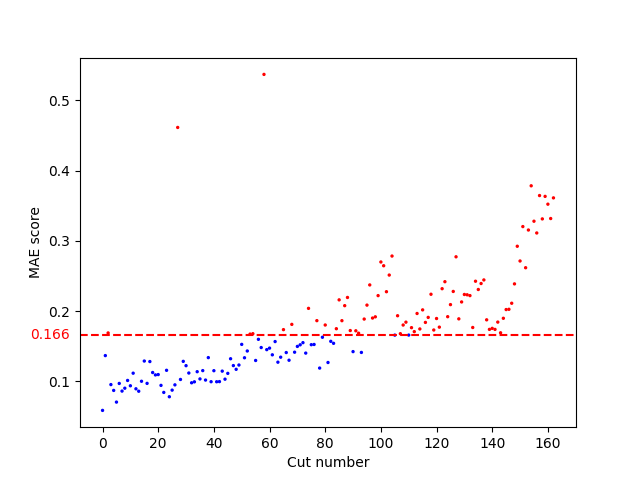

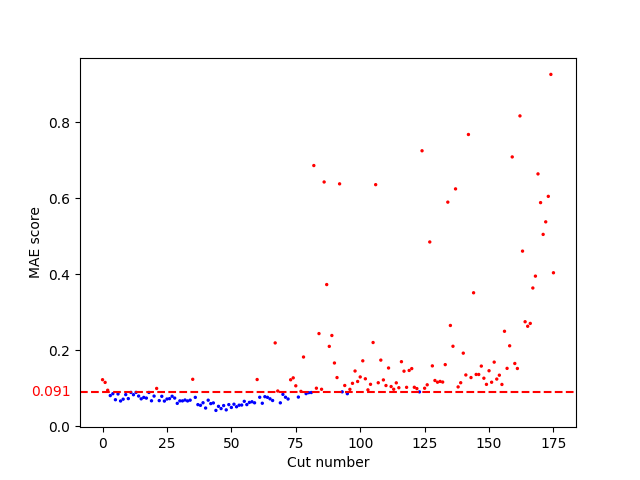

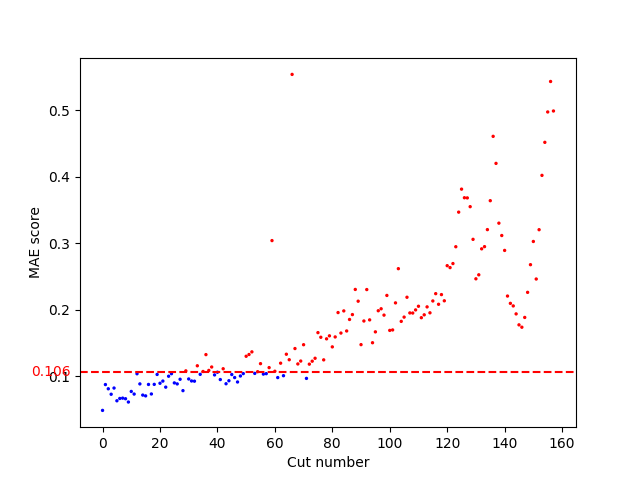

In [10]:
for test in exps:
    fig, ax = vae[test].scatter_scores(['mae'])

## VAE models latent space

/home/tomje/python/Acoustic-Emission/ml/autoencoder.py:967: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


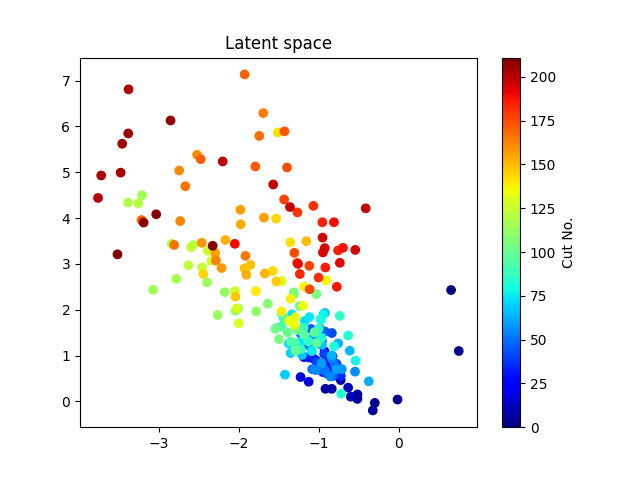

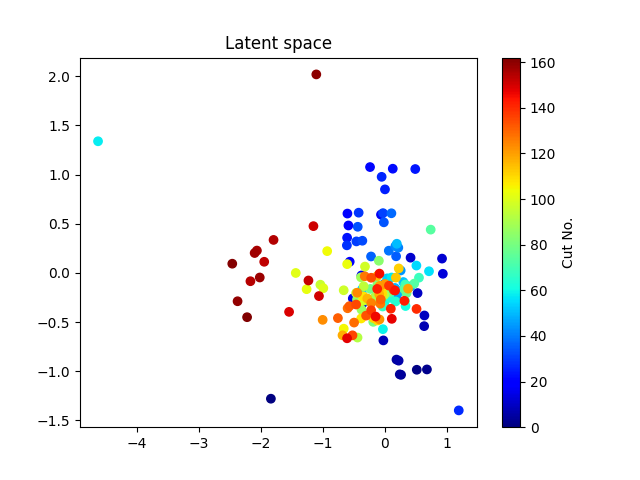

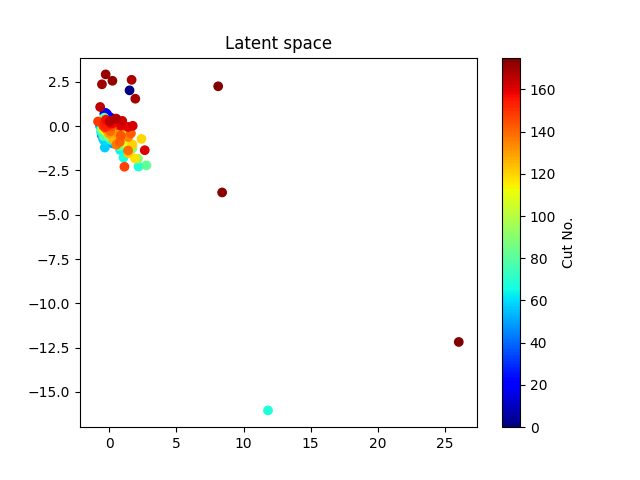

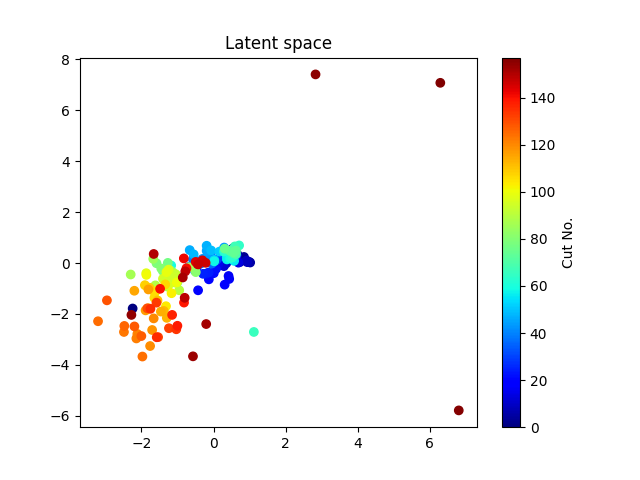

In [11]:
for test in exps:
    fig, ax = vae[test].plot_latent_space()

## Wear measurements comparison

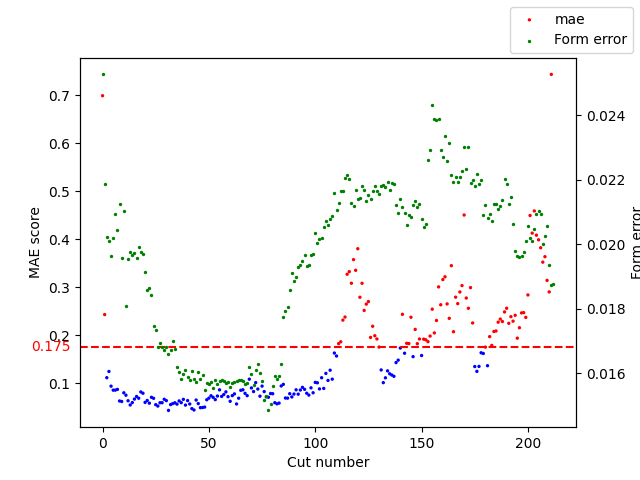

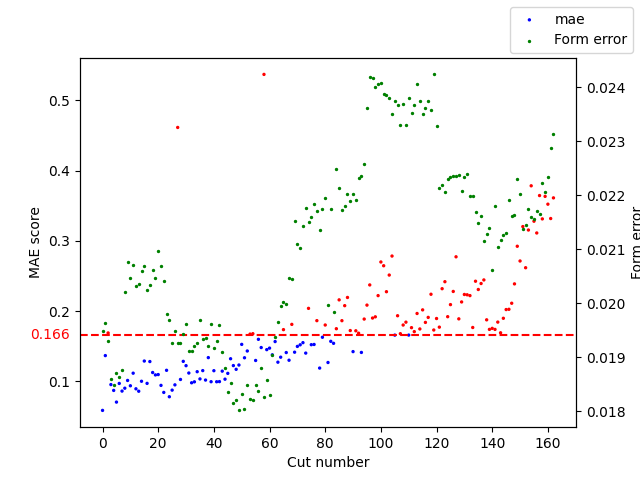

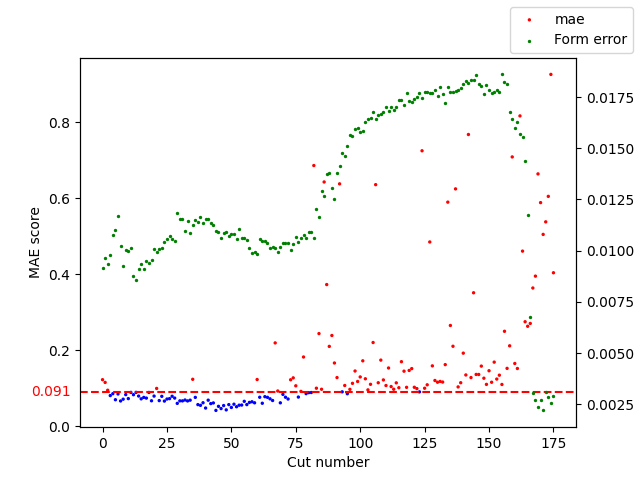

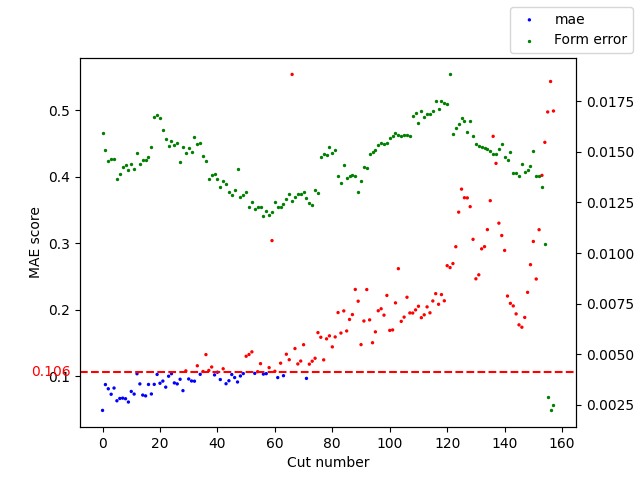

In [13]:
feature = 'Form error'
metric = 'mae'

for test in exps:
    fig, ax = vae[test].scatter_scores([metric])

    exp = resources.load(test)
    feat = exp.features[feature]

    ax2 = ax.twinx()

    ax2.scatter(range(len(feat)), feat,
                s=2,
                label=feature,
                c='g',
                )
    ax2.set_ylabel(feature)
    fig.legend()
